<a href="https://colab.research.google.com/github/geraldoferreira1963/MVP_Analise_Dados/blob/main/C%C3%B3pia_de_MVP_Analise_Dados_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#########################################################
# Objetivo do trabalho :
#
#
#
######################################################

# carregando os módulos e bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import requests
from io import StringIO
#from prettytable import PrettyTable
#from sklearn.metrics import mean_squared_error
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
#from google.colab import drive
#drive.mount("/content/drive")

#carregar datasets
# (1) Agrofood_co2_emission.csv : dataset criado a partir da fusão e reprocessamento de diversos dados individuais com dados referentes
#                                 emissões de CO2 decorrentes da produção de alimentos, discriminados em diversos setores da Cadeia de Produção de Alimentos
# (2) world food production.csv : dataset com dados da produção de alguns tipos de alimentos dos países

#file_1='drive/MyDrive/dataset/Agrofood_co2_emission.csv'
#file_2='drive/MyDrive/dataset/world food production.csv'

url_1 = 'https://raw.githubusercontent.com/geraldoferreira1963/MVP_Analise_Dados/main/Agrofood_co2_emission.csv'
url_2 ='https://raw.githubusercontent.com/geraldoferreira1963/MVP_Analise_Dados/main/world_food_production.csv'

response_1 = requests.get(url_1)
response_2 = requests.get(url_2)

file_content_1 = response_1.text
file_1 = StringIO(file_content_1)

file_content_2 = response_2.text
file_2 = StringIO(file_content_2)

df_food_co2_emission=pd.read_csv(file_1)
df_food_production_1=pd.read_csv(file_2)

#selecionado o periodo (1994 - 2020) para a análise dos dados
df_co2_1= df_food_co2_emission[df_food_co2_emission.Year > 1994]

#df_co2_2 = co2_emission[co2_emission.Year > 1994]
df_food_1=df_food_production_1[df_food_production_1.Year > 1994]

# Verificação inicial das colunas e seus características

print('Campos do Dataset de Emissão CO2 - Produção de Alimento','\n\n',df_co2_1.columns,'\n\n',df_co2_1.dtypes)

#print('\n\n\n\n','Campos do Dataset da Emissão CO2 - Diversas Fontes','\n\n',df_co2_2.columns,'\n\n',df_co2_2.dtypes)

print('\n\n\n\n','Campos do Dataset de Produção de Alimentos','\n\n',df_food_1.columns,'\n\n',df_food_1.dtypes)

# Padronizações dos datasets em preparação para o merge das duas tabelas

# Padronizacao dos nomes das colunas em ambos os datasets relacionado aos paises

df_co2_1.rename({'Area': 'Country'}, axis=1, inplace=True)
df_food_1.rename({'Entity': 'Country'}, axis=1, inplace=True)

# Padronização dos nomes dos paises em ambos os datasets

lista_paises_co2 = df_co2_1["Country"].unique()
lista_paises_food = df_food_1["Country"].unique()
diff1 = np.setdiff1d(lista_paises_co2, lista_paises_food)
diff2 = np.setdiff1d(lista_paises_food, lista_paises_co2)

# remover todas as entradas no dataframe de Produção de Comida contendo a string FAO, bem regiões ou continentes do mundo

df_food_1 = df_food_1[~df_food_1['Country'].str.contains('FAO', case=False)]
remover_regioes_food = ('Africa', 'Asia', 'Europe','European Union (27)', 'High-income countries','Low-income countries','Lower-middle-income countries',
                        'North America', 'Oceania', 'South America','Upper-middle-income countries', 'World')
df_food_1 = df_food_1[~df_food_1['Country'].isin(remover_regioes_food)]



padronizar_nomes_paises_de=["United States of America","Russian Federation","Bolivia (Plurinational State of)","Cabo Verde","Democratic Republic of the Congo",
                            "Timor-Leste","Iran (Islamic Republic of)","Lao People's Democratic Republic","Republic of Moldova","Netherlands (Kingdom of the)",
                            "Democratic People's Republic of Korea","Republic of Korea","Syrian Arab Republic","China, Taiwan Province of",
                            "Venezuela (Bolivarian Republic of)","Viet Nam","United Republic of Tanzania","Micronesia (Federated States of)"]

padronizar_nomes_paises_para=['United States','Russia','Bolivia', 'Cape Verde', 'Democratic Republic of Congo','East Timor','Iran', 'Laos', 'Moldova','Netherlands', 'North Korea',
                              'South Korea','Syria','Taiwan', 'Venezuela', 'Vietnam','Tanzania','Melanesia']

df_co2_1=df_co2_1.replace(padronizar_nomes_paises_de,padronizar_nomes_paises_para)

# Remover dataset Emissão CO2 paises sem correspondente no dataset de Produção de Alimentos

remover_paises_adicionais_df_co2_1= ('American Samoa', 'Andorra', 'Anguilla', 'Aruba', 'Bahrain','Belgium-Luxembourg', 'Bermuda', 'British Virgin Islands',
                                      'Brunei Darussalam', 'Cayman Islands', 'Channel Islands','China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
                                      'Cook Islands', 'Cyprus', 'Equatorial Guinea','Falkland Islands (Malvinas)', 'Faroe Islands', 'French Polynesia',
                                      'Gibraltar', 'Greenland', 'Guadeloupe', 'Guam', 'Holy See','Iceland', 'Isle of Man', 'Kiribati', 'Liberia', 'Liechtenstein',
                                      'Marshall Islands', 'Martinique', 'Mayotte', 'Monaco', 'Mongolia','Montserrat', 'Nauru', 'Netherlands Antilles (former)',
                                      'Niue','Northern Mariana Islands', 'Norway', 'Palau', 'Palestine','Saint Helena, Ascension and Tristan da Cunha',
                                      'Saint Kitts and Nevis', 'Saint Pierre and Miquelon', 'Samoa','San Marino', 'Seychelles', 'Singapore', 'Solomon Islands',
                                      'Tokelau', 'Tonga', 'Tunisia', 'Turks and Caicos Islands','Tuvalu', 'United Kingdom of Great Britain and Northern Ireland',
                                      'United States Virgin Islands', 'Wallis and Futuna Islands','Western Sahara')

df_co2_1 = df_co2_1[~df_co2_1['Country'].isin(remover_paises_adicionais_df_co2_1)]


# remover dataset Produção de Alimentos paises sem correspondente no dataset de Emissão CO2

remover_paises_adicionais_df_food_1 =( "Cote d'Ivoire", 'French Guiana', 'Micronesia (country)','Reunion', 'Turkey')

df_food_1 = df_food_1[~df_food_1['Country'].isin(remover_paises_adicionais_df_food_1)]


#maiores produtores de alimentos
#fonte https://www.investopedia.com/articles/investing/100615/4-countries-produce-most-food.asp

maiores_produtores=['China', 'United States','Brazil', 'India']

colunas_merger = ('Country', 'Year')

# criar um novo dataset consolidado

df=pd.merge(left=df_co2_1,right=df_food_1,on=colunas_merger)

# preparando consolidação de informações para análise
# emissão_co2_cultivo : lista as principais fontes de emissão de CO2 na produção de alimentos

emissao_co2_cultivo = [ 'Crop Residues','Rice Cultivation', 'Drained organic soils (CO2)','Agrifood Systems Waste Disposal',
                       'Manure applied to Soils','Manure left on Pasture', 'Manure Management','Fires in organic soils']

# emissão_co2_cadeia_processamento_comida : consolidar os dados da emissão de CO2 na Cadeia de Processamento de Alimentos
# fonte : https://www.fertisystem.com.br/m/blog/60d384532ab2c055dc7e9716/quais-sao-as-etapas-das-cadeias-produtivas-do-agronegocio-entenda#:~:text=Distribui%C3%A7%C3%A3o,e%20supermercados%2C%20por%20exemplo).
#
emissão_co2_cadeia_processamento_comida = ['Food Processing', 'Food Packaging']

# emissão_co2_cadeia_fertilizantes_pesticidas = ['Fertilizers Manufacturing','Pesticides Manufacturing']

incendios=['Savanna fires', 'Forest fires','Fires in humid tropical forests']

cultura_graos=['Maize Production (tonnes)', 'Rice  Production ( tonnes)', 'Wheat Production (tonnes)', 'Soybeans  Production (tonnes)','Rye  Production (tonnes)']

cultura_frutas=['Oranges  Production (tonnes)', 'Peas, dry Production ( tonnes)', 'Grapes  Production (tonnes)', 'Cocoa beans Production (tonnes)',
                'Bananas  Production ( tonnes)', 'Avocados Production (tonnes)','Apples Production (tonnes)']

cultura_legumes =['Yams  Production (tonnes)', 'Tomatoes Production (tonnes)', 'Sweet potatoes  Production (tonnes)','Sunflower seed  Production (tonnes)', 'Potatoes  Production (tonnes)']

culturas_outros=['Tea  Production ( tonnes )', 'Sugar cane Production (tonnes)','Palm oil  Production (tonnes)', 'Coffee, green Production ( tonnes)']

df['soma_emissao_co2_cultivo'] = df[emissao_co2_cultivo].sum(axis=1)
df['soma_emissao_co2_incendio']=df[incendios].sum(axis=1)
df['soma_emissao_co2_cadeia_processamento']=df[emissão_co2_cadeia_processamento_comida].sum(axis=1)
df['total_producao_graos']=df[cultura_graos].sum(axis=1)
df['total_producao_frutas']=df[cultura_frutas].sum(axis=1)
df['total_producao_legumes']=df[cultura_legumes].sum(axis=1)
df['total_producao_outros']=df[culturas_outros].sum(axis=1)

Campos do Dataset de Emissão CO2 - Produção de Alimento 

 Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',
       'Average Temperature °C'],
      dtype='object') 

 Area                                object
Year                                 int64
Savanna fires                      float64
Forest fires          

<ipython-input-2-226b8ad2398f>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_co2_1.rename({'Area': 'Country'}, axis=1, inplace=True)
<ipython-input-2-226b8ad2398f>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_food_1.rename({'Entity': 'Country'}, axis=1, inplace=True)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4216 entries, 0 to 4215
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Country                                4216 non-null   object 
 1   Year                                   4216 non-null   int64  
 2   Savanna fires                          4216 non-null   float64
 3   Forest fires                           4216 non-null   float64
 4   Crop Residues                          4190 non-null   float64
 5   Rice Cultivation                       4216 non-null   float64
 6   Drained organic soils (CO2)            4216 non-null   float64
 7   Pesticides Manufacturing               4216 non-null   float64
 8   Food Transport                         4216 non-null   float64
 9   Forestland                             4086 non-null   float64
 10  Net Forest conversion                  4086 non-null   float64
 11  Food



 Análise das Emissões na Cadeia de Produção de Alimentos dos Maiores Produtores


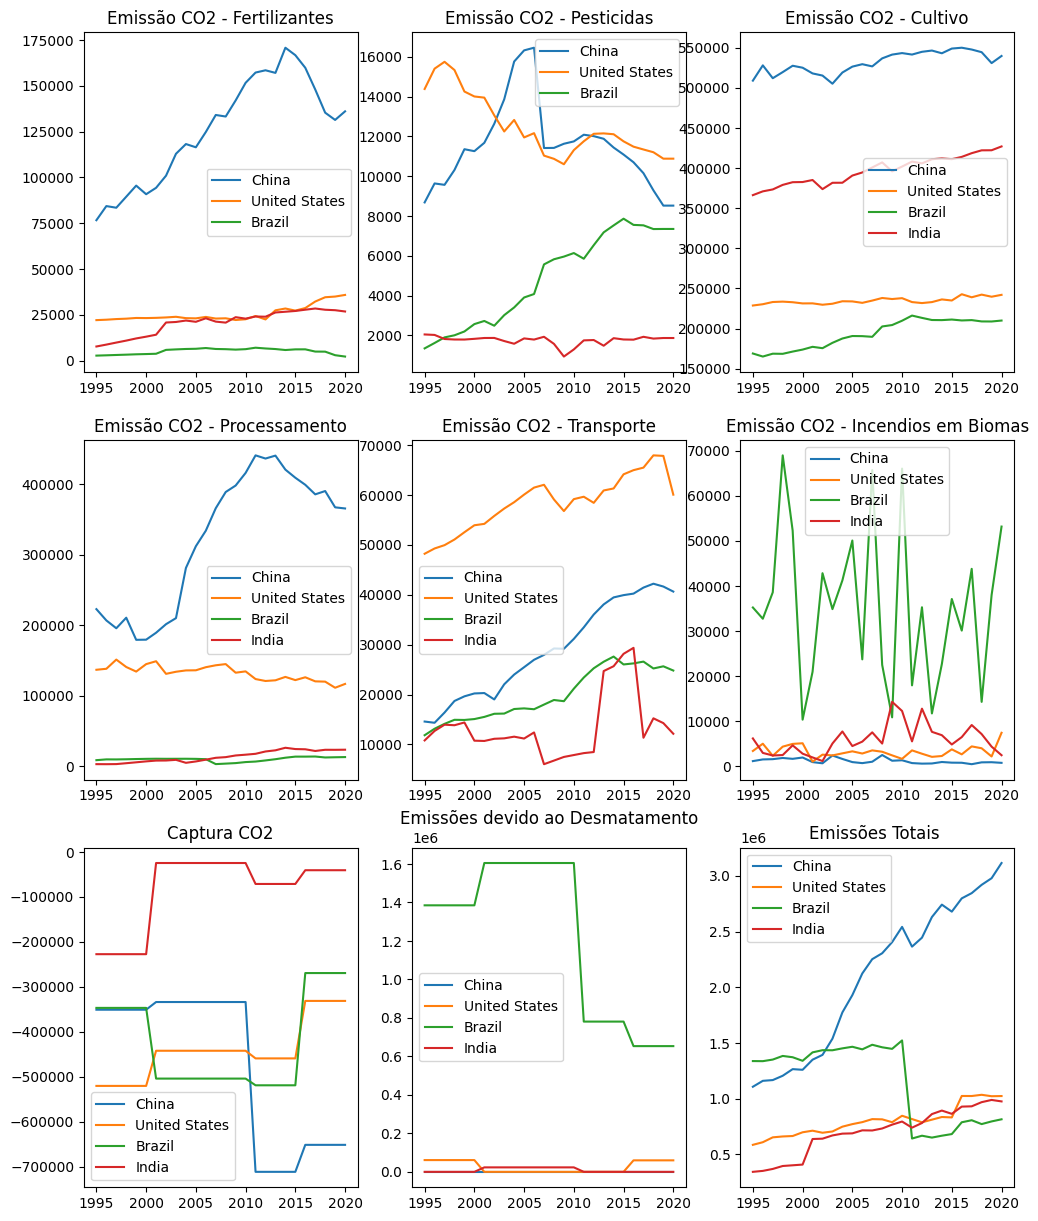



 Contribuição das principais fontes de emissão de CO2 na Produção de Alimentos


 Produção de Alimentos


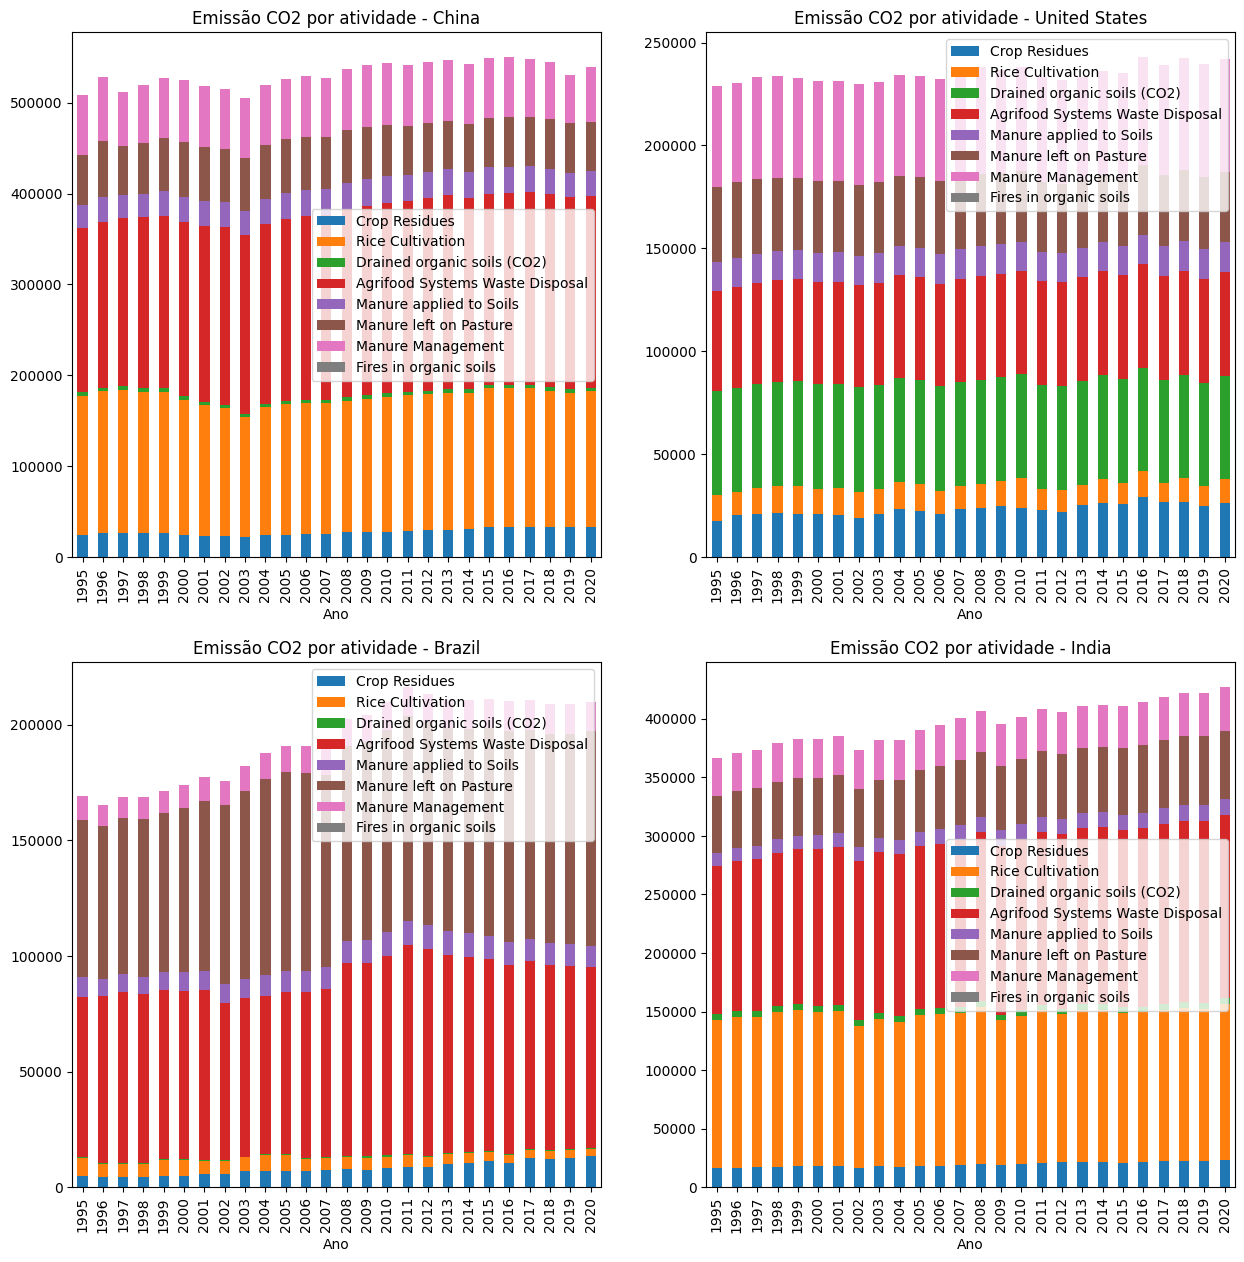

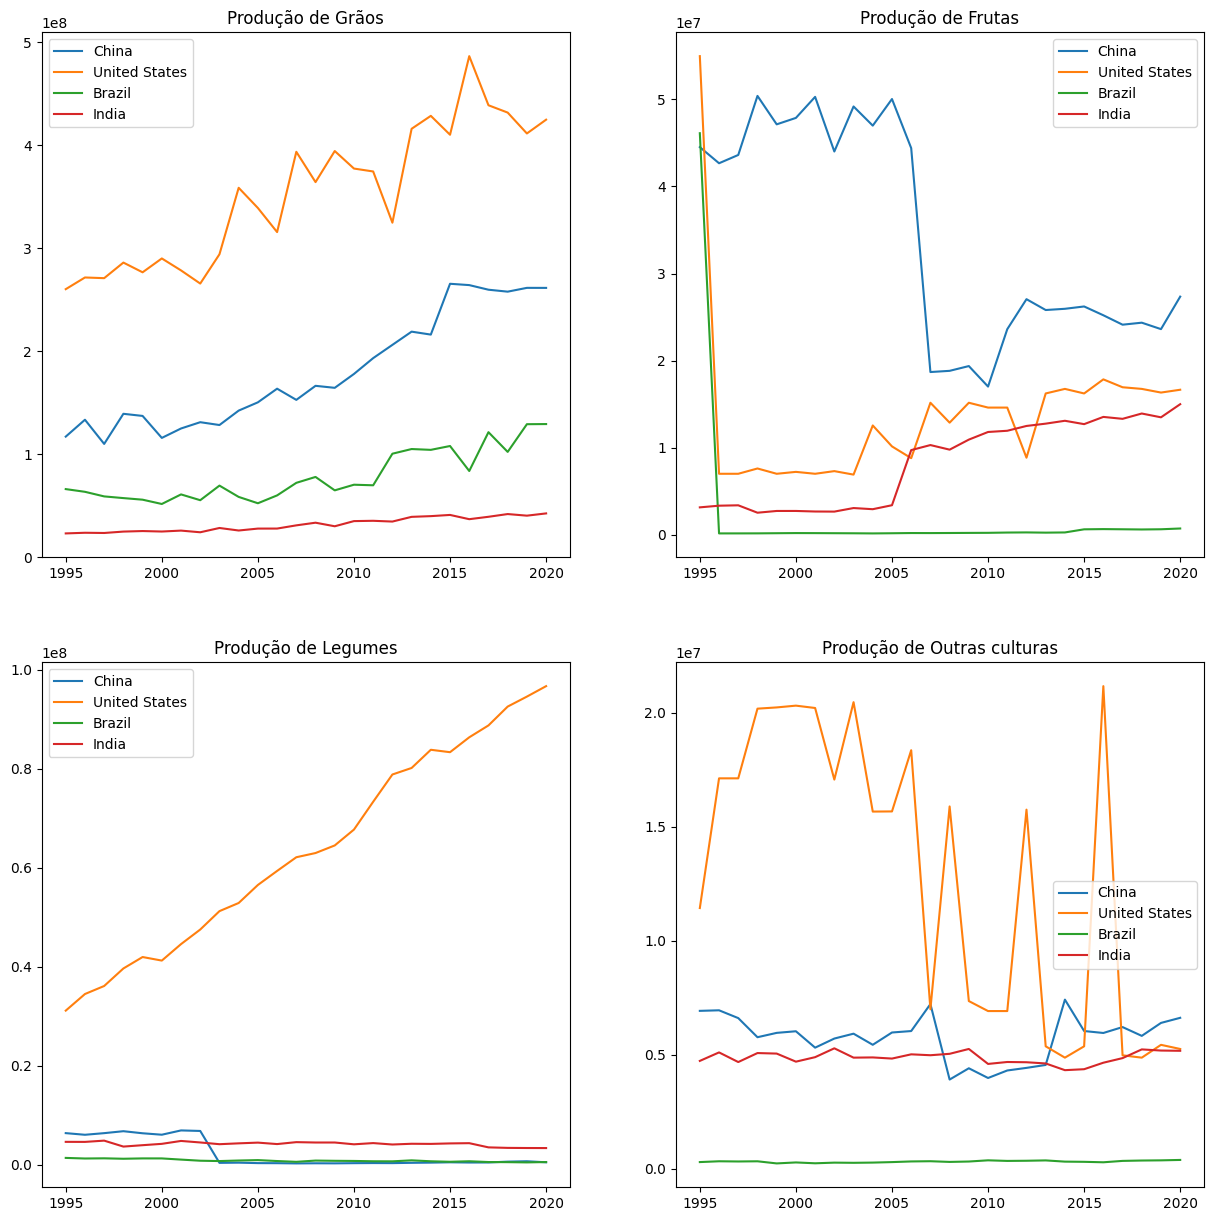

In [ ]:
# Análise das Emissões na Cadeia de Produção de Alimentos dos Maiores Produtores

print('\n\n', 'Análise das Emissões na Cadeia de Produção de Alimentos dos Maiores Produtores')

fig, ax = plt.subplots(3,3, figsize = (12, 15))

# definição da paleta de cores para os gráficos

cores_paises_produtores = {'China' :'r', 'United States' :'b','Brazil':'y', 'India':'magenta'}
cores_incendios={'Savanna fires':'r', 'Forest fires':'b','Fires in humid tropical forests':'gray'}


for pais in maiores_produtores:
    ax[0,0].legend(cores_paises_produtores)
    ax[0,0].plot(df['Year'].unique(),df[df.Country == pais].loc[:,'Fertilizers Manufacturing'], label=cores_paises_produtores)
    ax[0,0].set_title('Emissão CO2 - Fertilizantes')
    ax[0,1].legend(cores_paises_produtores)
    ax[0,1].plot(df['Year'].unique(),df[df.Country == pais].loc[:,'Pesticides Manufacturing'], label=cores_paises_produtores)
    ax[0,1].set_title('Emissão CO2 - Pesticidas')
    ax[0,2].plot(df['Year'].unique(),df[df.Country == pais].loc[:,'soma_emissao_co2_cultivo'], label=cores_paises_produtores)
    ax[0,2].set_title('Emissão CO2 - Cultivo')
    ax[0,2].legend(cores_paises_produtores)
    ax[1,0].plot(df['Year'].unique(),df[df.Country == pais].loc[:,'soma_emissao_co2_cadeia_processamento'], label=cores_paises_produtores)
    ax[1,0].set_title('Emissão CO2 - Processamento')
    ax[1,0].legend(cores_paises_produtores)
    ax[1,1].plot(df['Year'].unique(),df[df.Country == pais].loc[:,'Food Transport'], label=cores_paises_produtores)
    ax[1,1].set_title('Emissão CO2 - Transporte')
    ax[1,1].legend(cores_paises_produtores)
    ax[1,2].plot(df['Year'].unique(),df[df.Country == pais].loc[:,'soma_emissao_co2_incendio'], label=cores_paises_produtores)
    ax[1,2].set_title('Emissão CO2 - Incendios em Biomas')
    ax[1,2].legend(cores_paises_produtores)
    ax[2,0].plot(df['Year'].unique(),df[df.Country == pais].loc[:,'Forestland'], label=cores_paises_produtores)
    ax[2,0].set_title('Captura CO2')
    ax[2,0].legend(cores_paises_produtores)
    ax[2,1].plot(df['Year'].unique(),df[df.Country == pais].loc[:,'Net Forest conversion'], label=cores_paises_produtores)
    ax[2,1].set_title('Emissões devido ao Desmatamento')
    ax[2,1].legend(cores_paises_produtores)
    ax[2,2].plot(df['Year'].unique(),df[df.Country == pais].loc[:,'total_emission'], label=cores_paises_produtores)
    ax[2,2].set_title('Emissões Totais ')
    ax[2,2].legend(cores_paises_produtores)

plt.show()

# Analisar nos maiores produtores a contribuição das principais fontes de emissão de CO2 na Produção de Alimentos

print('\n\n', 'Contribuição das principais fontes de emissão de CO2 na Produção de Alimentos')
fig,ax2 = plt.subplots(2,2, figsize = (15, 15))
i=j=0

for pais in maiores_produtores:
  df[df.Country == pais].loc[:, ['Year'] + emissao_co2_cultivo].plot(x='Year', legend=True, ax=ax2[i,j], kind='bar', title = 'Emissão CO2 por atividade - ' + pais ,stacked=True, xlabel='Ano')
  j+=1
  if j == 2:
    i+=1
    j=0
  #ax[i,j].legend(loc=10)

# Produção de Alimentos

print('\n\n', 'Produção de Alimentos')

fig, ax3 = plt.subplots(2,2, figsize = (15, 15))

for pais in maiores_produtores:
    ax3[0,0].plot(df['Year'].unique(),df[df.Country == pais].loc[:,'total_producao_graos'], label=cores_paises_produtores)
    ax3[0,0].set_title('Produção de Grãos')
    ax3[0,0].legend(cores_paises_produtores)
    ax3[0,1].plot(df['Year'].unique(),df[df.Country == pais].loc[:,'total_producao_frutas'], label=cores_paises_produtores)
    ax3[0,1].set_title('Produção de Frutas')
    ax3[0,1].legend(cores_paises_produtores)
    ax3[1,0].plot(df['Year'].unique(),df[df.Country == pais].loc[:,'total_producao_legumes'], label=cores_paises_produtores)
    ax3[1,0].set_title('Produção de Legumes')
    ax3[1,0].legend(cores_paises_produtores)
    ax3[1,1].plot(df['Year'].unique(),df[df.Country == pais].loc[:,'total_producao_outros'], label=cores_paises_produtores)
    ax3[1,1].set_title('Produção de Outras culturas')
    ax3[1,1].legend(cores_paises_produtores)

plt.show()



 Análise da Covariance -  India


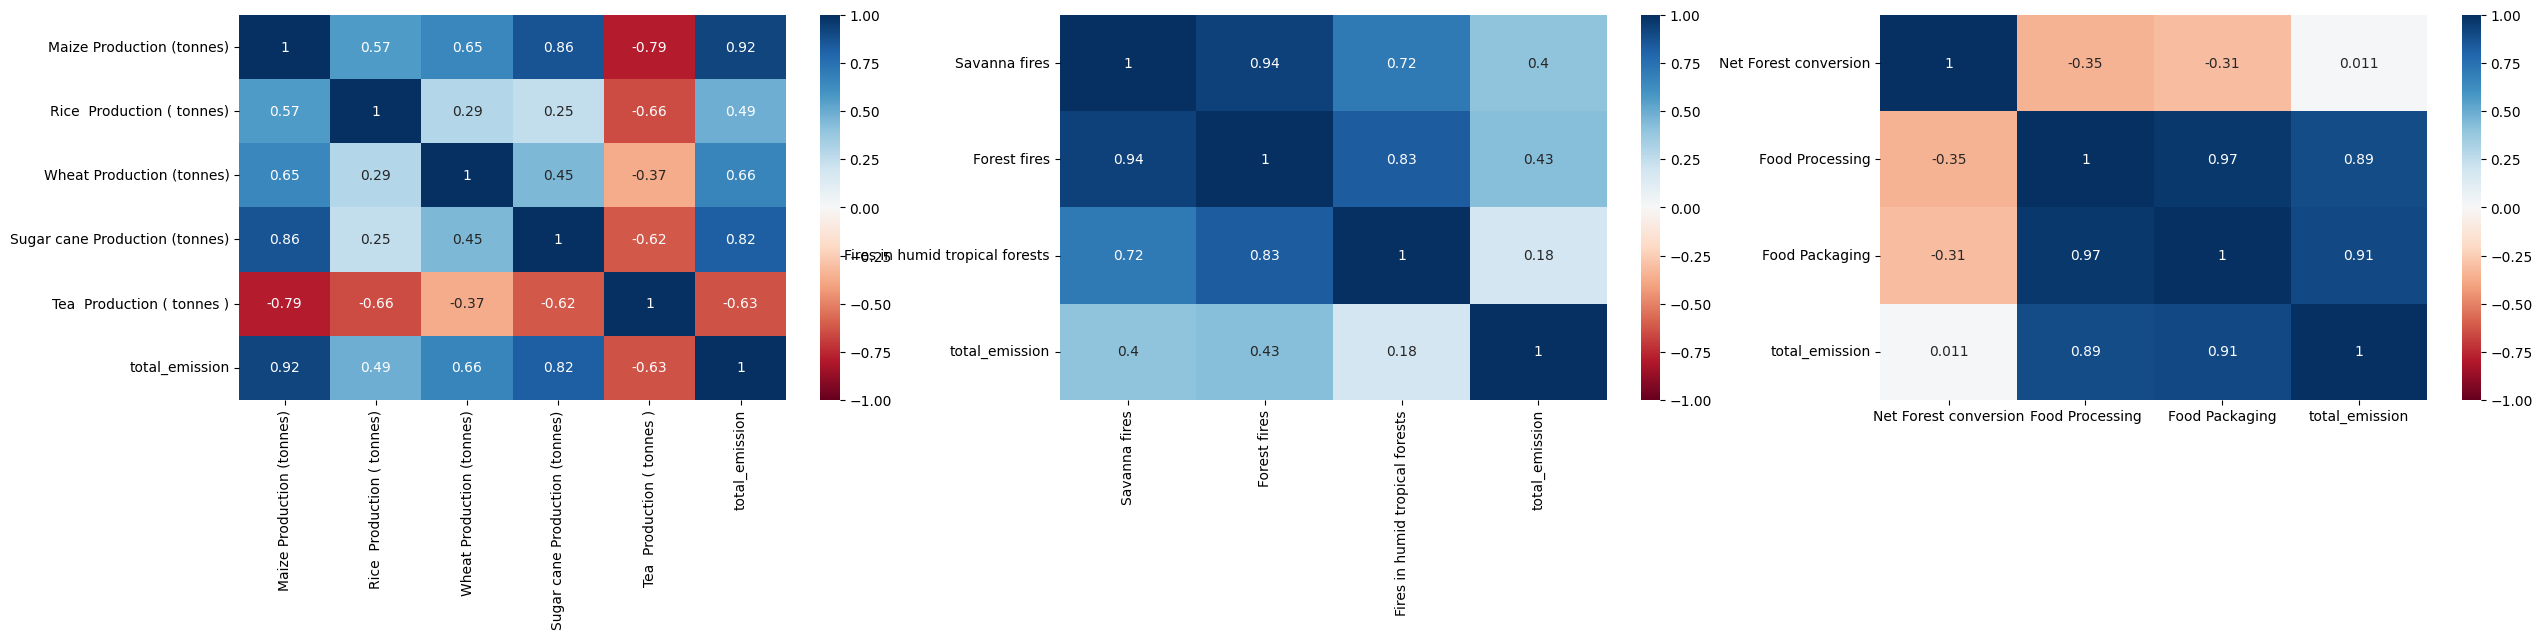



 Análise da Covariance -  China


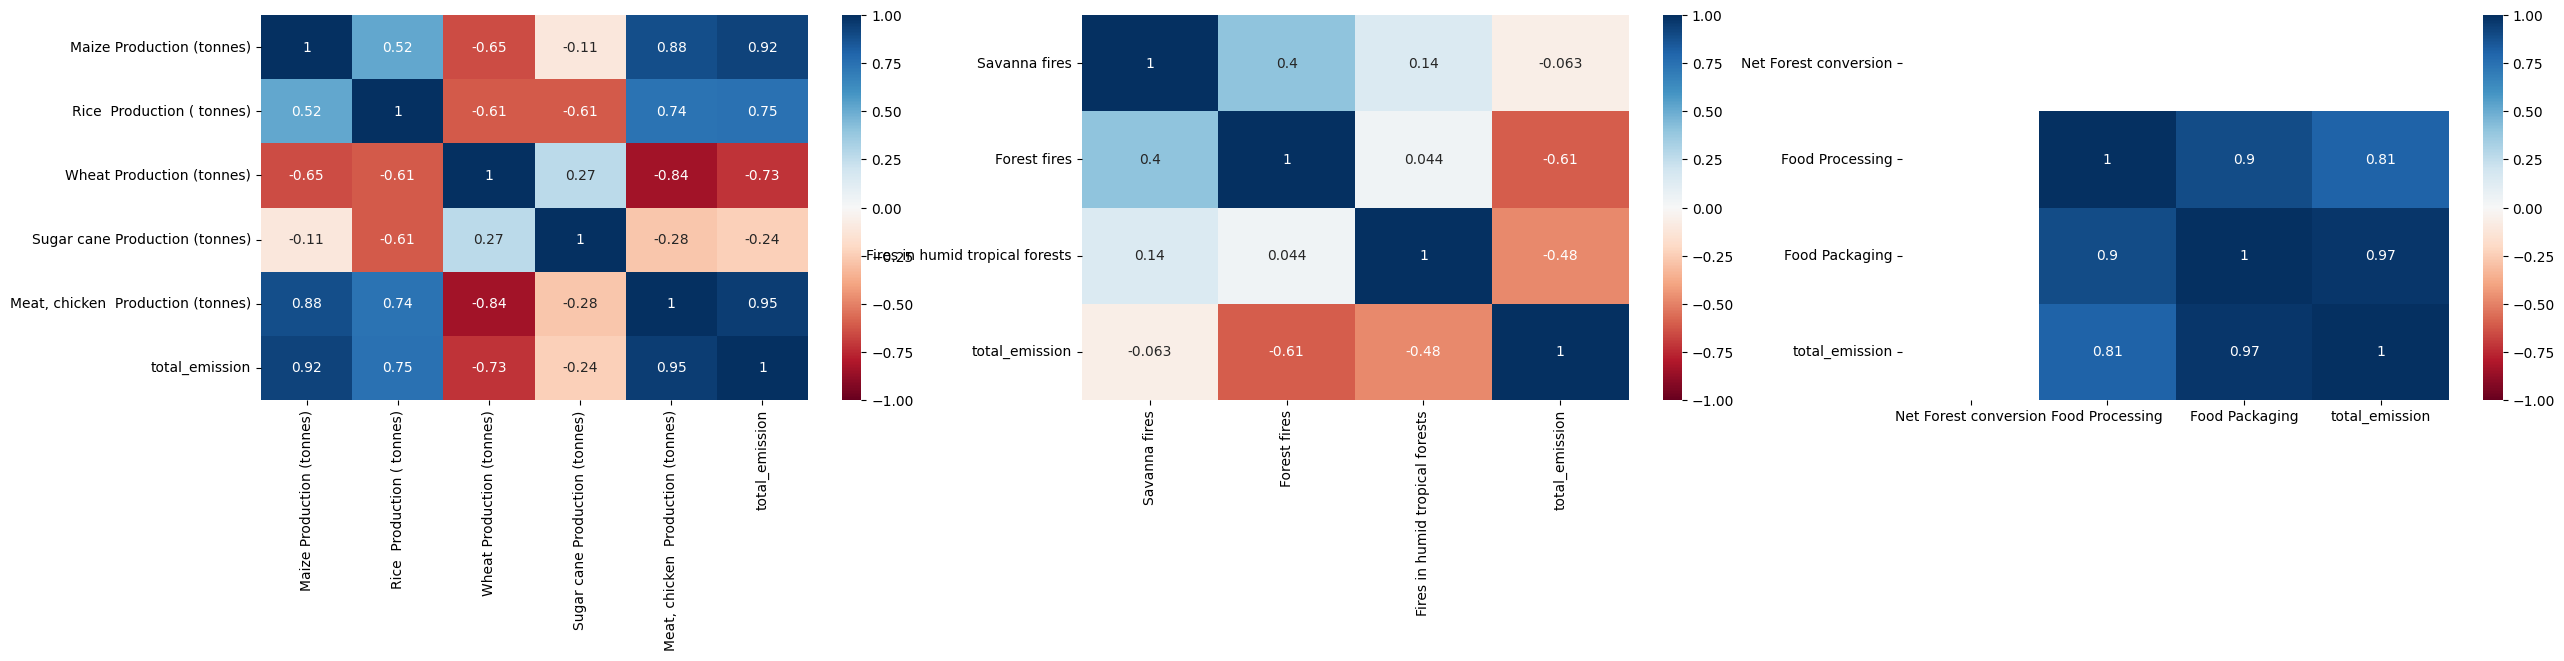



 Análise da Covariance -  United States


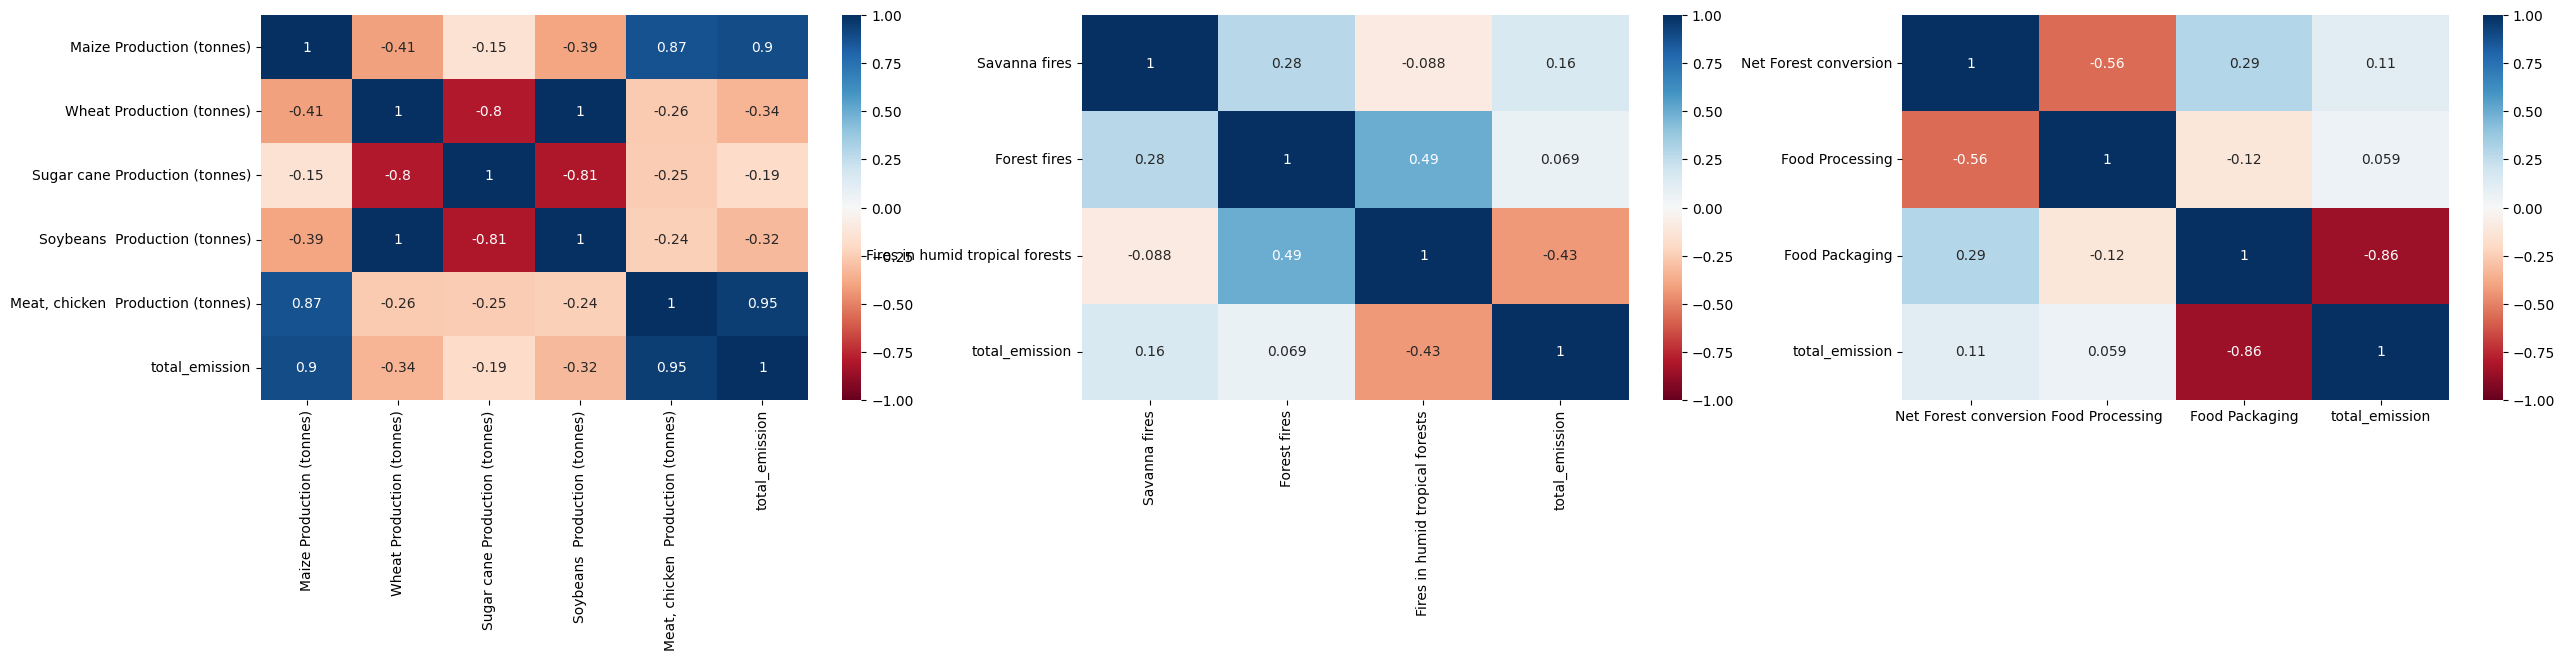



 Análise da Covariance -  Brazil


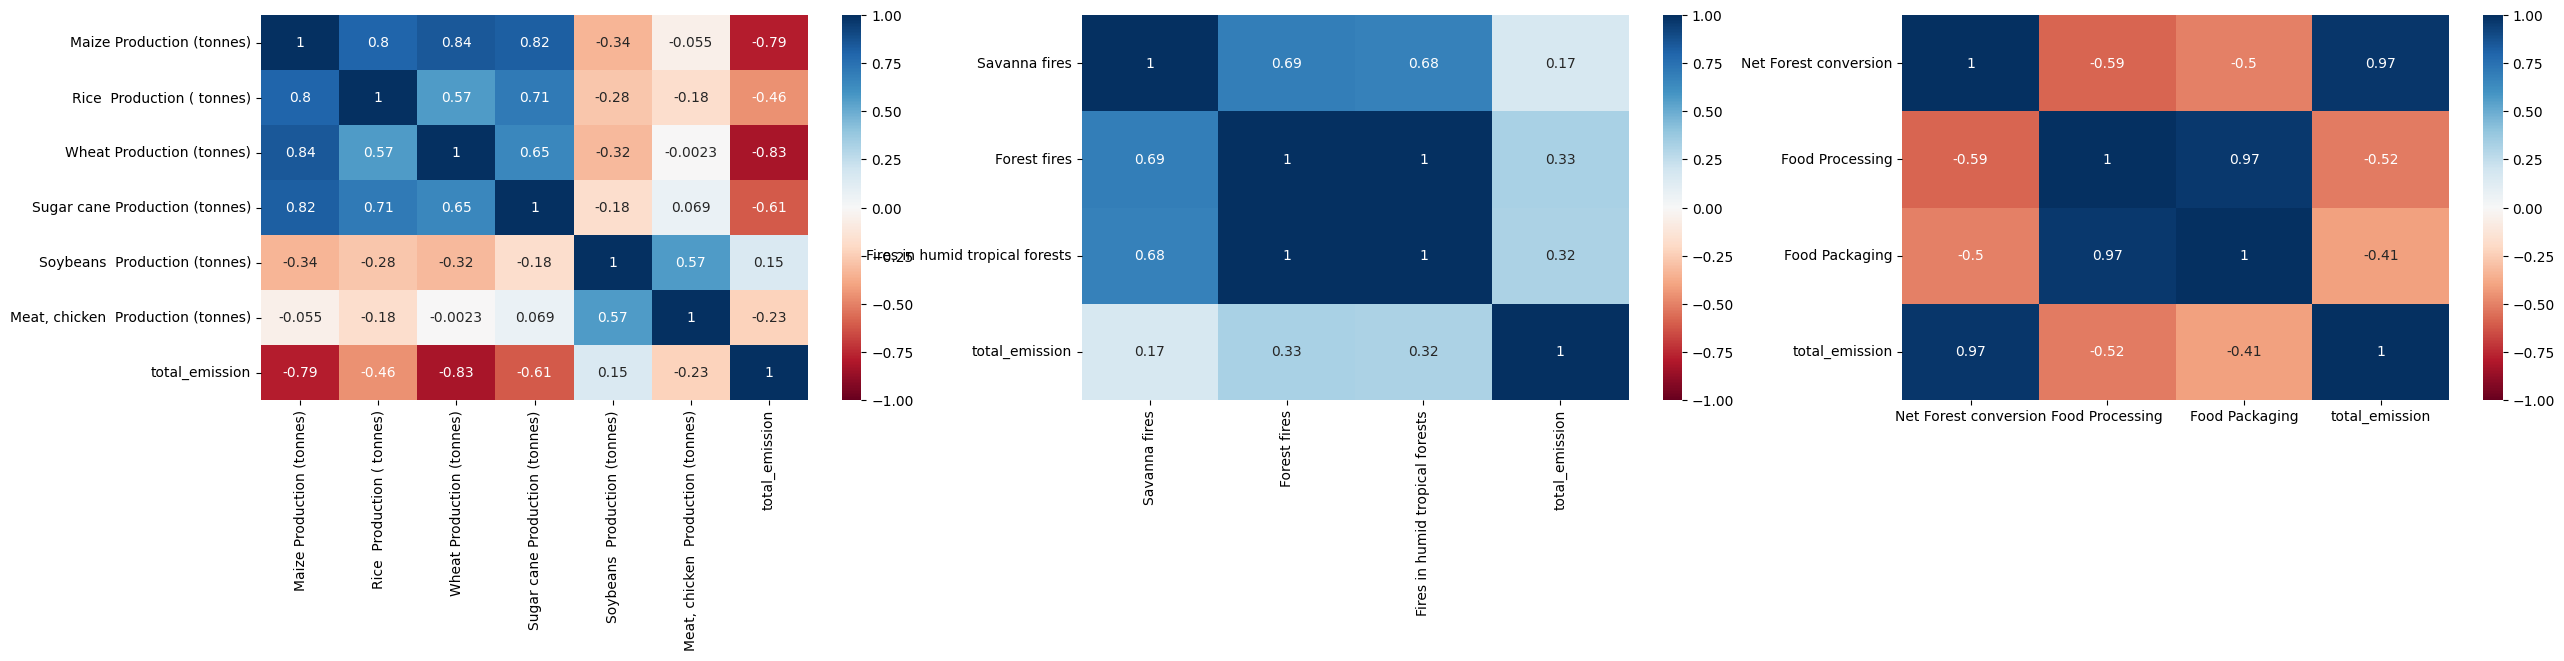

In [ ]:
# principais produtos dos 4 maiores produtores
# fontes
# India ==> https://pt.wikipedia.org/wiki/Economia_da_%C3%8Dndia#:~:text=Os%20principais%20produtos%20cultivados%20s%C3%A3o,monoculturas%20voltadas%20para%20a%20exporta%C3%A7%C3%A3o.
# China ==> https://pt.wikipedia.org/wiki/Agropecu%C3%A1ria_na_China
# EUA ==> https://pt.wikipedia.org/wiki/Economia_dos_Estados_Unidos#:~:text=O%20pa%C3%ADs%20tamb%C3%A9m%20%C3%A9%20o,na%20t%C3%A3o%20chamada%20Corn%20Belt.
# Brasil ==>

India_principais_produtos = ['Maize Production (tonnes)', 'Rice  Production ( tonnes)','Wheat Production (tonnes)',
                             'Sugar cane Production (tonnes)','Tea  Production ( tonnes )','total_emission']
China_principais_produtos = ['Maize Production (tonnes)', 'Rice  Production ( tonnes)','Wheat Production (tonnes)',
                             'Sugar cane Production (tonnes)','Meat, chicken  Production (tonnes)','total_emission']
EUA_principais_produtos = ['Maize Production (tonnes)', 'Wheat Production (tonnes)','Sugar cane Production (tonnes)',
                              'Soybeans  Production (tonnes)','Meat, chicken  Production (tonnes)','total_emission']
Brasil_principais_produtos = ['Maize Production (tonnes)', 'Rice  Production ( tonnes)','Wheat Production (tonnes)',
                              'Sugar cane Production (tonnes)','Soybeans  Production (tonnes)', 'Meat, chicken  Production (tonnes)','total_emission']

Dicionario_paises = {'India':India_principais_produtos,'China':China_principais_produtos,'United States':EUA_principais_produtos,'Brazil':Brasil_principais_produtos}

incendios=['Savanna fires', 'Forest fires','Fires in humid tropical forests']

for pais in Dicionario_paises:
  print('\n\n','Análise da Covariance - ',pais)
  fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (30, 5))
  sns.heatmap(df[df.Country == pais].loc[:,Dicionario_paises.get(pais)].corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1,ax=ax1)
  sns.heatmap(df[df.Country == pais].loc[:,['Savanna fires', 'Forest fires','Fires in humid tropical forests','total_emission']].corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1,ax=ax2)
  sns.heatmap(df[df.Country == pais].loc[:,['Net Forest conversion','Food Processing', 'Food Packaging','total_emission']].corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1,ax=ax3)
  plt.show()

In [ ]:
df_2020=df[df['Year']==2020]
df_2020=df_2020.dropna(axis=1)
df_clus=df_2020.drop(['Country','Year'],axis=1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_sc = sc.fit_transform(df_clus)
df_sc = pd.DataFrame(df_sc, columns=df_clus.columns)
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, random_state=1)
model.fit(df_sc)
cluster = model.labels_
df_clus['Country']=df_2020['Country']
df_clus['Cluster']=cluster



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Savanna fires,Forest fires,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,...,Apples Production (tonnes),soma_emissao_co2_cultivo,soma_emissao_co2_incendio,soma_emissao_co2_cadeia_processamento,total_producao_graos,total_producao_frutas,total_producao_legumes,total_producao_outros,Country,Cluster
25,10.8427,0.0000,578.415600,0.0000,107.628149,545.3243,630.7575,101.731000,353.930640,3597.1846,...,270857.0,8558.490700,10.8427,1995.583572,9880907.48,29028628.50,1.246570e+08,4.842314e+06,Afghanistan,0
51,2.5732,0.0000,248.061497,105.6310,8.000000,262.7122,186.3487,1.055900,57.082900,687.6005,...,102167.0,1935.154497,2.5732,130.935400,1663328.75,6482684.01,3.641732e+06,1.008734e+09,Albania,0
77,41.1136,107.1825,1.317100,0.0000,48.000000,4307.4471,922.8476,626.686500,1884.219400,9494.9015,...,566823.5,14332.644600,148.2961,4412.828600,49569580.75,4351717.26,2.877518e+07,5.746483e+07,Algeria,0
103,24245.0015,13139.8211,66.044200,316.1237,1.000000,568.2273,253.6741,2500.235737,96.361900,2705.5988,...,587000.0,7128.857900,50122.7662,1737.887904,32702787.21,31681098.29,5.627519e+07,2.123540e+08,Angola,2
129,0.0000,0.0000,246.407276,0.0000,1.000000,21.6821,39.6455,6.040500,172.179779,34.5840,...,10360384.0,288.597876,0.0000,424.393969,15521558.40,61782279.00,6.916345e+07,1.842588e+08,Antigua and Barbuda,1


In [ ]:
df_clus[df_clus.Cluster == 2].loc[:,['Country','total_emission']]


,Country,total_emission
103,Angola,101188.177044
566,Brazil,814927.864500
774,Central African Republic,70589.853462
1112,Democratic Republic of Congo,698776.161824
4189,Zambia,95970.904147
